11953

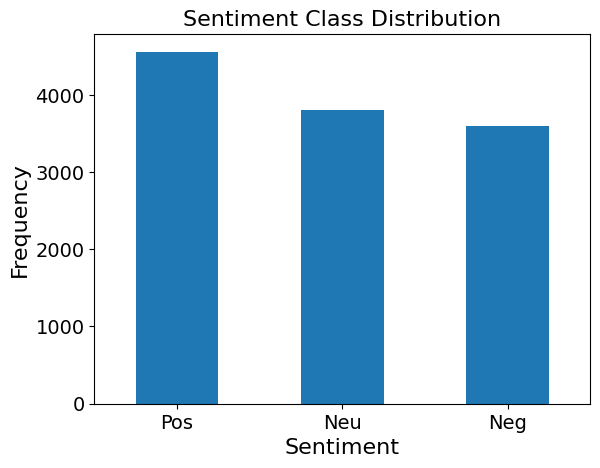

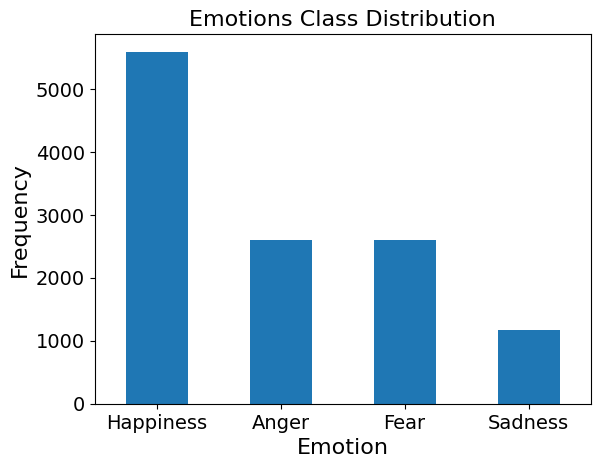

In [8]:
# classes distribution plots

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 1000)
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('Tadawul_Sentiment_Emotions_Analysis.csv', encoding='utf-8', engine='python', sep='\t')


df.fillna('', inplace=True)  
display(len(df))

sentiment_mapping = {'p': 'Pos', 'n': 'Neg', 't': 'Neu'}
df['sentiment'] = df['sentiment'].replace(sentiment_mapping)

print()

df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Class Distribution')

plt.title('Sentiment Class Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Increase font size of x and y ticks
plt.xticks(rotation=0, fontsize=14)  # Horizontal x-axis labels with increased font size
plt.yticks(fontsize=14) 


# plt.savefig('figures/sentiment_class_distribution.png', format='png', dpi=300)

plt.show()

print()
print()


df['emotion'].value_counts().plot(kind='bar', title='Emotions Class Distribution')

plt.title('Emotions Class Distribution', fontsize=16)
plt.xlabel('Emotion', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Increase font size of x and y ticks
plt.xticks(rotation=0, fontsize=14)  # Horizontal x-axis labels with increased font size
plt.yticks(fontsize=14) 

# plt.savefig('figures/emotions_class_distribution.png', format='png', dpi=300)


plt.show()


In [14]:
# word-cloud figure

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 1000)
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('Tadawul_Sentiment_Emotions_Analysis.csv', encoding='utf-8', engine='python', sep='\t')


df.fillna('', inplace=True)  
display(len(df))

sentiment_mapping = {'p': 'Pos', 'n': 'Neg', 't': 'Neu'}
df['sentiment'] = df['sentiment'].replace(sentiment_mapping)






arabic_stopwords = [
    "ŸÅŸä", "ÿπŸÑŸâ", "ŸÖŸÜ", "ÿ•ŸÑŸâ", "ÿπŸÜ", "ÿ£Ÿà", "Ÿà", "ÿ£ŸÜ", "ÿ•ÿ∞ÿß", "Ÿáÿ∞ÿß", "Ÿáÿ∞Ÿá", "ŸÑŸÉŸÜ", "ŸÖÿß", "ŸÑÿß", "ŸÑŸÖ", "ŸÑŸÜ", "ŸÉŸÑ", 
    "ÿ•ŸÜ", "ŸÉÿßŸÜ", "ŸáŸà", "ŸáŸä", "ŸáŸÖ", "Ÿáÿß", "ŸÇÿØ", "ÿ£Ÿä", "ÿ£ŸäŸÜ", "ŸÉŸäŸÅ", "ÿ®ŸäŸÜ", "ÿ®ÿπÿØ", "ŸÇÿ®ŸÑ", "ŸÖÿπ", "ŸÖÿß", "ŸÑŸÖÿßÿ∞ÿß", 
    "ÿ•ÿ∞", "ÿßŸÑÿ∞Ÿä", "ÿßŸÑÿ™Ÿä", "ÿ∞ŸÑŸÉ", "ÿ™ŸÑŸÉ", "Ÿáÿ§ŸÑÿßÿ°", "ŸáŸÜÿßŸÉ", "ÿ£ŸÜÿ™", "ÿ£ŸÜÿß", "ŸÜÿ≠ŸÜ", "ÿ£ŸÜÿ™ŸÖ", "ÿ•ŸÑÿÆ", "ÿ•ŸÑŸä", "ÿπŸÑŸä", 
    "ÿ£ŸÜÿß", "ÿ£ŸÜÿ™", "ŸáŸà", "ŸáŸä", "ŸÜÿ≠ŸÜ", "Ÿáÿ∞ÿß", "ÿ™ÿ≠ÿ™", "ŸÅŸàŸÇ", "ÿ®", "ŸÑ", "ŸÉ", "Ÿà", "ÿ•ÿ∞", "ÿßŸÑ", "ÿ∞ŸÑŸÉ", "ŸÑŸá", "ÿ≠ÿ™Ÿâ", 
    "ŸÉŸÑ", "ÿ®ÿπÿ∂", "ŸÜÿπŸÖ", "ŸÑÿß", "ÿ£ŸäŸÜ", "ŸáŸÑ", "ÿ•ÿ∞ŸÜ", "ŸÑŸÖ", "ÿ±ÿ®ŸÖÿß", "ÿ£ŸÖÿßŸÖ", "ÿ´ŸÖ", "ŸÖÿ´ŸÑ", "ÿßŸÑÿ∞Ÿä", "ÿßŸÑÿ∞ŸäŸÜ"
]

# Example list of Arabic stop words (can be expanded)
# arabic_stop_words = [
#     'ŸÅŸä', 'ÿπŸÑŸâ', 'ŸÖŸÜ', 'ÿ•ŸÑŸâ', 'ŸÖÿß', 'ÿπŸÜ', 'ÿ£ŸÜ', 'ÿ•ÿ∞', 'ÿ´ŸÖ', 'ÿ®ŸäŸÜ', 'ŸÑŸÉŸÜ', 'ŸÉŸÖÿß', 'ÿ£Ÿà', 
#     'ÿ£Ÿä', 'ÿ•ŸÑŸâ', 'ŸáŸà', 'ŸáŸä', 'Ÿáÿ∞ÿß', 'Ÿáÿ∞Ÿá', 'ÿ∞ŸÑŸÉ', 'ŸÑÿ∞ŸÑŸÉ', 'ÿ®ŸÖÿß', 'ŸÖŸÜŸáÿß', 'ÿπŸÜÿØ', 'ÿ•ŸÜ', 'Ÿà', 
#     'ŸÑÿß', 'ŸÑŸÖ', 'ŸÑŸÜ', 'ÿ•ŸÜ', 'ÿ•ÿ∞ÿß', 'ŸÉÿßŸÜ', 'ŸÇÿØ', 'ŸÖÿß', 'ŸáŸÜÿßŸÉ', 'ŸÉŸÑ', 'ÿ£ŸäŸÜ', 'ŸÖÿπ', 'ŸÉŸäŸÅ', 'ŸÉŸÑŸÖÿß', 
#     'ÿ®ÿπÿ∂', 'Ÿàÿ£ŸÜ', 'Ÿàÿ£Ÿäÿ∂ÿß', 'ÿ∫Ÿäÿ±', 'ÿ∞ŸÑŸÉ', 'ŸÑÿØŸä', 'ÿπŸÑŸâ', 'Ÿáÿ∞Ÿá', 'ŸÅŸäŸá'
# ]

# You can add more stop words to the list as needed.

import pandas as pd

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word not in arabic_stopwords]  # Filter out stop words
    return ' '.join(filtered_words)  # Rejoin the filtered words

# Apply the function to the 'text' column
df['text'] = df['text'].apply(remove_stopwords)



from wordcloud import WordCloud

# Assuming 'text' is the column containing the textual data
all_text = ' '.join(df['text'].tolist())
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)



# Specify the path to an Arabic font (ensure the TTF file is accessible)
# Example font (you need to adjust the path to your system's font location)
font_path = 'arabic_font/Amiri-Regular.ttf'  # Replace with the correct path to your Arabic font

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(all_text)




plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png', format='png', dpi=300)
plt.show()








print()



11953

11953

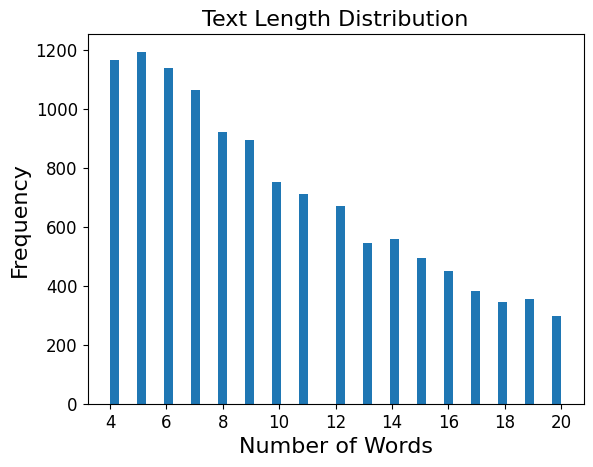

In [17]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 1000)
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('Tadawul_Sentiment_Emotions_Analysis.csv', encoding='utf-8', engine='python', sep='\t')


df.fillna('', inplace=True)  
display(len(df))

sentiment_mapping = {'p': 'Pos', 'n': 'Neg', 't': 'Neu'}
df['sentiment'] = df['sentiment'].replace(sentiment_mapping)




# Increase font size of x and y ticks
plt.xticks(rotation=0, fontsize=12)  # Horizontal x-axis labels with increased font size
plt.yticks(fontsize=12) 

df['text_length'] = df['text'].apply(lambda x: len(x.split()))
df['text_length'].plot(kind='hist', bins=50, title='Text Length Distribution')


plt.title('Text Length Distribution', fontsize=16)
plt.xlabel('Number of Words', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.show()


In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 1000)
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('Tadawul_Sentiment_Emotions_Analysis.csv', encoding='utf-8', engine='python', sep='\t')


df.fillna('', inplace=True)  
display(len(df))

sentiment_mapping = {'p': 'Pos', 'n': 'Neg', 't': 'Neu'}
df['sentiment'] = df['sentiment'].replace(sentiment_mapping)





df['text_length'] = df['text'].apply(lambda x: len(x.split()))
df['text_length'].plot(kind='hist', bins=50, title='Text Length Distribution')
plt.xlabel('Number of Words')
plt.show()


print()



from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_grams(corpus, n_gram=1, n=None):
    vec = CountVectorizer(ngram_range=(n_gram, n_gram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 10 bigrams
bigrams = get_top_n_grams(df['text'], n_gram=2, n=10)
print(bigrams)

print()


# Get top 10 trigrams
bigrams = get_top_n_grams(df['text'], n_gram=3, n=10)
print(bigrams)



print()




# display(df.columns)
# display(len(df))
# display(df[:4])



# classes = set(df['sentiment'].values)
# display(classes)

# c = df['sentiment'].value_counts()
# display(c)

# df['sentiment'] = df['sentiment'].astype('category')
# df['label'] = df['sentiment'].cat.codes

# df = df[['text', 'label']]
# classes_num = len(classes)
# display(classes_num)
# display(len(df))




In [5]:
# compute p-value

import scipy.stats as stats
import pandas as pd

# Example performance data for 4 models across 5 folds
data = {
    'Model A': [0.85, 0.83, 0.86, 0.84, 0.87],
    'Model B': [0.87, 0.85, 0.88, 0.86, 0.89],
    'Model C': [0.84, 0.82, 0.85, 0.83, 0.86],
    'Model D': [0.86, 0.84, 0.87, 0.85, 0.88]
}

# Convert data into a pandas DataFrame
df = pd.DataFrame(data)

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(df['Model A'], df['Model B'], df['Model C'], df['Model D'])

print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Flatten the DataFrame to prepare for pairwise comparison
values = df.melt(var_name='Model', value_name='Accuracy')

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=values['Accuracy'], groups=values['Model'], alpha=0.05)

# Print the results
print(tukey_result)

from scipy import stats

# Compare Model A and Model B
t_statistic, p_value = stats.ttest_rel(df['Model A'], df['Model B'])

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")



F-statistic: 3.3333333333333335
p-value: 0.04611550897078252
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Model A Model B     0.02 0.2288 -0.0086  0.0486  False
Model A Model C    -0.01 0.7516 -0.0386  0.0186  False
Model A Model D     0.01 0.7516 -0.0186  0.0386  False
Model B Model C    -0.03 0.0382 -0.0586 -0.0014   True
Model B Model D    -0.01 0.7516 -0.0386  0.0186  False
Model C Model D     0.02 0.2288 -0.0086  0.0486  False
------------------------------------------------------
t-statistic: -inf
p-value: 0.0


/home/ffq/miniconda3/envs/p1/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [13]:
# grouping and counting sentiment miss-prediction results
import os
import pandas as pd

# Step 1: Read multiple CSV files from a directory
directory = 'csv/'

# Create an empty list to store individual DataFrames
dfs = []

# Loop over each CSV file in the directory and read it into a DataFrame
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, encoding='utf-8', engine='python', sep='\t')
        dfs.append(df)

# Step 2: Concatenate all DataFrames
df_combined = pd.concat(dfs, ignore_index=True)
# df_combined.fillna('ŸÖ', inplace=True)

df_combined.fillna('', inplace=True)

# df['predicted_label'] = df['predicted_label'].replace('', '', regex=False)
display(df_combined[:5])
# Step 3: Group by 'text' column and count occurrences of each sentiment class
# Assuming 'predicted_label' is the column representing the sentiment
df_grouped = df_combined.groupby('text')['predicted_label'].value_counts().unstack(fill_value=0)

# Step 4: Display the grouped DataFrame (text with sentiment counts)
display(df_grouped[:10])


df_grouped = pd.DataFrame(df_grouped)

# Step 1: Compute the max and sum of the predicted labels for each text
# df_grouped['max_predicted'] = df_grouped.max(axis=1)
df_grouped['sum_predicted'] = df_grouped.sum(axis=1)


df_grouped['max_predicted'] = df_grouped[['optimistic', 'neutral', 'pessimistic']].max(axis=1)

# Step 2: Get the name of the column (field) that contains the max value
df_grouped['max_label'] = df_grouped[['optimistic', 'neutral', 'pessimistic']].idxmax(axis=1)

df_grouped = df_grouped.sort_values(by='max_predicted', ascending=False)

df_grouped = df_grouped.reset_index()

display(len(df_grouped))
display(df_grouped[:10])
df_grouped.to_csv('pred_new.csv', index=False, encoding='utf-8', sep='\t')

text predicted_label   
0  ÿπÿßÿßÿßÿßÿßÿßÿßÿßÿßÿßÿßÿßÿßÿßÿßÿßÿßÿßÿ¨ŸÑ : ÿßŸÑŸÜÿßÿØŸä ŸäÿπŸÑŸÜ ÿ±ÿ≥ŸÖŸäÿßŸã ÿßŸÇÿß...     pessimistic  \
1                              ÿ™ÿπÿ®ÿ™ ŸÖŸÜ ÿ¨ÿßŸÉŸà ÿπŸäÿ™ ÿ™ÿ∑ŸÑÿπ     pessimistic   
2           ŸÜÿ®Ÿä ŸÖÿ±ÿ™ÿØŸá ŸÜŸÇÿ∂Ÿä ÿπŸÑŸäŸáŸÖ ŸàÿπŸÑŸâ ŸÖÿÆÿßŸÑŸÅÿßÿ™ ÿßŸàÿ±ÿßŸàÿß     pessimistic   
3  ÿ®ÿπÿØ ŸÖÿ±Ÿàÿ± 10 ÿØŸÇÿßÿ¶ŸÇ ÿ™ÿ£ŸÉÿØÿ™ ÿ®ŸÜÿ≥ÿ®ÿ© ŸÖŸÑŸäÿßÿ± ÿ®ÿßŸÑŸÖÿ¶ÿ© ÿ£ŸÜ ...         neutral   
4  ÿ™ÿßŸÑŸäÿ≥ŸÉÿß ŸäÿπŸäÿØ ÿ£ŸäÿßŸÖ ÿ≠ŸÖŸÑŸá ŸÑŸÑŸÜÿµÿ± ŸÑŸàÿ≠ÿØŸá ŸÅŸä ŸÖŸàÿ≥ŸÖŸä 20...      optimistic   

    true_label  
0      neutral  
1      neutral  
2   optimistic  
3  pessimistic  
4      neutral

predicted_label                                     neutral  optimistic   
text                                                                      
"ŸÑŸÇÿØ Ÿáÿ±ŸÖŸÜÿß ŸÖŸÜ ÿ£ÿ¨ŸÑ Ÿáÿ∞Ÿá ÿßŸÑŸÑÿ≠ÿ∏ÿ© ÿßŸÑÿ™ÿßÿ±ŸäÿÆŸäÿ©"                 562           0  \
# ÿßŸÑŸÑŸáŸÖ ÿµŸÑ Ÿàÿ≥ŸÑŸëŸÖ ÿπŸÑŸâ ŸÜÿ®ŸäŸÜÿß ŸÖÿ≠ŸÖÿØ Ÿàÿ¢ŸÑŸá Ÿàÿµÿ≠ÿ®Ÿá Ÿàÿ≥ŸÑŸëŸÖ          0         289   
# ÿØŸàÿ±Ÿä 2019 .. ÿπÿ®ÿØÿßŸÑÿ±ÿ≤ÿßŸÇ ÿ≠ŸÖÿØÿßŸÑŸÑŸá 34 ŸáÿØŸÅ .. ŸáÿØÿßŸÅ...        0         472   
# ÿØŸàÿ±Ÿä 2020 .. ÿπÿ®ÿØÿßŸÑÿ±ÿ≤ÿßŸÇ ÿ≠ŸÖÿØÿßŸÑŸÑŸá 29 ŸáÿØŸÅ                   0         932   
# ÿØŸàÿ±Ÿä 2023 .. ÿ™ÿßŸÑŸäÿ≥ŸÉÿß 20 ŸáÿØŸÅ                             0        1596   
# ÿØŸàÿ±Ÿä ÿÆÿßÿØŸÖ ÿßŸÑÿ≠ÿ±ŸÖŸäŸÜ 1995 .. ÿ£ŸàŸáŸäŸÜ ŸÉŸäŸÜŸäÿØŸä 13 ŸáÿØŸÅ         908           0   
# ÿØŸàÿ±Ÿä ÿÆÿßÿØŸÖ ÿßŸÑÿ≠ÿ±ŸÖŸäŸÜ 1998 .. ÿ≠ÿ≥ŸäŸÜ ŸáÿßÿØŸä 9 ÿ£ŸáÿØÿßŸÅ          1128           0   
# ÿØŸàÿ±Ÿä ÿÆÿßÿØŸÖ ÿßŸÑÿ≠ÿ±ŸÖŸäŸÜ 2002 .. ÿÆŸàŸÑŸäŸà ÿ≥Ÿäÿ≤ÿßÿ± 8 ÿ£ŸáÿØÿßŸÅ         492           0   
# ŸÇŸÑ _ ŸÇÿ≥ŸÖ                                                0           0   
( 2 / 0 ) ÿ≠ŸÖÿØÿßŸÑŸÑŸá 2                                    2309           0   

predicted_label                                     pessimistic  
text                                                             
"ŸÑŸÇÿØ Ÿáÿ±ŸÖŸÜÿß ŸÖŸÜ ÿ£ÿ¨ŸÑ Ÿáÿ∞Ÿá ÿßŸÑŸÑÿ≠ÿ∏ÿ© ÿßŸÑÿ™ÿßÿ±ŸäÿÆŸäÿ©"                       0  
# ÿßŸÑŸÑŸáŸÖ ÿµŸÑ Ÿàÿ≥ŸÑŸëŸÖ ÿπŸÑŸâ ŸÜÿ®ŸäŸÜÿß ŸÖÿ≠ŸÖÿØ Ÿàÿ¢ŸÑŸá Ÿàÿµÿ≠ÿ®Ÿá Ÿàÿ≥ŸÑŸëŸÖ              0  
# ÿØŸàÿ±Ÿä 2019 .. ÿπÿ®ÿØÿßŸÑÿ±ÿ≤ÿßŸÇ ÿ≠ŸÖÿØÿßŸÑŸÑŸá 34 ŸáÿØŸÅ .. ŸáÿØÿßŸÅ...            0  
# ÿØŸàÿ±Ÿä 2020 .. ÿπÿ®ÿØÿßŸÑÿ±ÿ≤ÿßŸÇ ÿ≠ŸÖÿØÿßŸÑŸÑŸá 29 ŸáÿØŸÅ                       0  
# ÿØŸàÿ±Ÿä 2023 .. ÿ™ÿßŸÑŸäÿ≥ŸÉÿß 20 ŸáÿØŸÅ                                 0  
# ÿØŸàÿ±Ÿä ÿÆÿßÿØŸÖ ÿßŸÑÿ≠ÿ±ŸÖŸäŸÜ 1995 .. ÿ£ŸàŸáŸäŸÜ ŸÉŸäŸÜŸäÿØŸä 13 ŸáÿØŸÅ               0  
# ÿØŸàÿ±Ÿä ÿÆÿßÿØŸÖ ÿßŸÑÿ≠ÿ±ŸÖŸäŸÜ 1998 .. ÿ≠ÿ≥ŸäŸÜ ŸáÿßÿØŸä 9 ÿ£ŸáÿØÿßŸÅ                 0  
# ÿØŸàÿ±Ÿä ÿÆÿßÿØŸÖ ÿßŸÑÿ≠ÿ±ŸÖŸäŸÜ 2002 .. ÿÆŸàŸÑŸäŸà ÿ≥Ÿäÿ≤ÿßÿ± 8 ÿ£ŸáÿØÿßŸÅ               0  
# ŸÇŸÑ _ ŸÇÿ≥ŸÖ                                                 1042  
( 2 / 0 ) ÿ≠ŸÖÿØÿßŸÑŸÑŸá 2                                           0

4559

predicted_label                                               text  neutral   
0                üî¥ ŸÜÿßÿ¥ÿ¶ŸäŸÜ #ÿßŸÑÿßÿ™ÿ≠ÿßÿØ ŸäŸÅŸàÿ≤ŸàŸÜ ÿπŸÑŸâ ÿßŸÑŸáŸÑÿßŸÑ ŸÅŸä ŸÖŸÇÿ± ŸÜÿßÿØ...        0  \
1                ÿßŸÑÿ¨Ÿáÿßÿ≤ ÿßŸÑÿ∑ÿ®Ÿä Ÿäÿ§ŸÉÿØ ÿ™ÿπÿßŸÅŸä ÿÆÿßŸÑÿØ ÿßŸÑÿ∫ŸÜÿßŸÖ ŸÖŸÜ ÿßŸÑÿ•ÿµÿßÿ®ÿ©...        0   
2                                ÿ™ÿ±ÿßŸÖÿ® ÿ≥ŸàŸÇ ÿßŸÑÿµŸàÿßÿ±ŸäÿÆ ŸäŸÜÿ≥ÿ≠ÿ® ŸÖŸÜ ÿ®ÿ±ŸäŸÉÿ≥        0   
3                ŸÜŸáÿßŸäÿ© ÿßŸÑŸÖŸàÿ≥ŸÖ Ÿäÿ¨ÿ® ÿ∑ÿ±ÿØ ŸÑÿßÿ®Ÿàÿ±ÿ™ Ÿà ÿßŸÑŸäŸÉÿ≥ ÿ™ŸäŸÑŸäÿ≥ Ÿà ÿ≥ÿß...        0   
4                ÿßŸÑÿ±Ÿäÿ™ÿßÿ™ ŸÖÿßÿ™ÿ™ÿ≠ÿ±ŸÉ. ÿ≠ÿØŸáÿß ÿ®ÿßŸÑŸÉÿ´Ÿäÿ± ŸÉŸÖ ŸáŸÑŸÑŸá ÿ™ÿ≠ÿ™ÿßÿ¨ ÿµÿ®...     5494   
5                ŸÜÿ≤ŸÑ ŸÜÿ≤ŸÑ ÿπÿ≤Ÿäÿ≤ü§£ ÿπÿ≤Ÿäÿ≤ ÿßŸÑŸÑÿ≤Ÿäÿ≤ ÿßŸÑÿßŸÜ ÿ®ŸäŸÇŸÑÿ® ÿßŸÑŸÜÿ™Ÿäÿ≠ÿ© Ÿá...     5356   
6                ÿßŸÑŸäŸàŸÖ ŸÑŸà ŸÖÿß ÿ´ÿ®ÿ™ ÿßŸÑŸÖÿ§ÿ¥ÿ± ŸÅŸàŸÇ 11070.512 ŸáÿØŸÅ 11017...     5253   
7                ÿßŸÜÿ™ ŸÖÿßŸäŸÜŸÅÿπ ŸÖÿπŸÉ ÿßŸÑÿßÿØÿ® ÿßŸÑÿßÿØÿ® ŸäŸÜŸÅÿπ ŸÖÿπ ÿßŸÑÿ®ÿ¥ÿ± ŸàÿßŸÜÿ™ ...     5248   
8                ŸÉŸÑŸÜÿß ÿπÿßÿ±ŸÅŸäŸÜ ÿßŸÜ ÿßŸÑÿØÿπŸÖ ÿ∞ÿß ŸÖŸÜ ÿßŸÑÿØŸàŸÑÿ© ŸÑŸÉŸÜŸáŸÖ ÿ≠ÿßÿ∑ŸäŸÜ ...     5227   
9                ÿ™ÿ¨ŸÖŸäÿπ Ÿàÿßÿ∂ÿ≠ ŸÅÿßÿ∂ÿ≠ Ÿäÿ≠ÿ™ÿßÿ¨ ÿßŸÑŸâ ÿµÿ®ÿ± Ÿàÿ∑ŸàŸÑ ÿ®ÿßŸÑ ÿ±ÿ∫ŸÖ ÿßŸÑÿ≠...        0   

predicted_label  optimistic  pessimistic  sum_predicted  max_predicted   
0                      6475            0           6475           6475  \
1                      5879            0           5879           5879   
2                         0         5814           5814           5814   
3                         0         5735           5735           5735   
4                         0            0           5494           5494   
5                         0            0           5356           5356   
6                        10            0           5263           5253   
7                         0            0           5248           5248   
8                         0            0           5227           5227   
9                      5200           27           5227           5200   

predicted_label    max_label  
0                 optimistic  
1                 optimistic  
2                pessimistic  
3                pessimistic  
4                    neutral  
5                    neutral  
6                    neutral  
7                    neutral  
8                    neutral  
9                 optimistic

In [20]:
import pandas as pd

df1 = pd.read_csv('future_sentiment_analysis_3.csv', encoding='utf-8', engine='python', sep='\t')
df1.fillna('', inplace=True)
# df1['sentiment'] = df1['sentiment'].replace('', 'ŸÖ')

display(df1[-10:])

df2 = pd.read_csv('pred_new.csv', encoding='utf-8', engine='python', sep='\t')
df2.fillna('', inplace=True)
display(df2[:5])

# df2.to_csv('hawamer_csv/tmp.csv', index=False, encoding='utf-8', sep='\t')
df2 = df2[:500]

df_merged = pd.merge(df1, df2[['text', 'max_label']], on='text', how='left', suffixes=('_df1', '_df2'))



display(df_merged[:5])


# Update the sentiment in df1 with sentiment from df2 where there is a match
df_merged['future_sentiment'] = df_merged['max_label'].combine_first(df_merged['future_sentiment'])

# Drop the extra sentiment_df2 column
df1_updated = df_merged.drop(columns=['max_label'])
c = df1['future_sentiment'].value_counts()
display(c)
c = df1_updated['future_sentiment'].value_counts()
display(c)
# Optionally, rename the updated sentiment column back to 'sentiment'
# df1_updated = df1_updated.rename(columns={'sentiment_df1': 'sentiment'})

# Display the updated DataFrame
display(df1_updated[-10:])
df1_updated.to_csv('future_sentiment_analysis_4.csv', index=False, encoding='utf-8', sep='\t')

text future_sentiment   
16142      ŸÑÿß ÿßÿ∞ŸÉÿ±Ÿáÿß 2006 ŸÖŸÜ ÿßŸÇŸÑ ÿßŸÑÿ¥ÿ±ŸÉÿßÿ™ ÿ≥ÿπÿ±ÿß ŸÖÿßÿ™ÿπÿØÿ™ 300          neutral  \
16143                                 ÿßÿ¥ÿ™ÿ∫ŸÑ ÿßŸà ŸÑÿ≥Ÿâ ÿπŸÜÿØŸÉŸÖ          neutral   
16144                ŸÜÿπŸÖ ÿßŸÜÿß ŸÖÿ∂ÿßÿ±ÿ® ŸàŸÑÿ≥ÿ™ ŸÖÿ™ÿÆÿµÿµ ŸÅŸä ÿßŸÑŸÅÿ™ÿßŸàŸä          neutral   
16145                           ŸÖŸÖŸÉŸÜ ŸÑÿßŸáŸÜÿ™Ÿä ÿßŸÑÿπŸÖÿ±ÿßŸÜ ŸàŸÅÿ±Ÿá          neutral   
16146  ÿ£ÿπÿ™ÿ∞ÿ± ŸÖŸÜŸÉŸÖ ŸÅŸä Ÿàÿ∂ÿπ ÿßŸÑÿ¥ÿßÿ±ÿ™ ŸÑŸàÿ¨ŸàÿØ ŸÖÿ¥ŸÉŸÑÿ© ŸÅŸä ÿ¨Ÿáÿßÿ≤Ÿä ...          neutral   
16147  ŸáŸÑ ŸàŸáŸÑ ŸàŸáŸÑ ÿßŸÑÿ≥ŸáŸÖ Ÿäÿ®ÿ™ŸÑ Ÿäÿ±ÿ™ŸÅÿπ ŸÖÿßŸÇÿµÿ± ÿßŸÑÿ≠ŸÇŸäŸÇŸá ÿ®ŸÑÿß ...          neutral   
16148  ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá ÿßÿ≥ÿ™ÿ∫ŸÅÿ± ÿßŸÑŸÑŸá ÿßŸÑÿπÿ∏ŸäŸÖ ÿ™ÿπÿ®ÿ™ ÿßÿØŸàÿ± ÿ±ÿßÿ®...          neutral   
16149  ÿßŸÅÿ∂ŸÑ ŸÇÿ±ÿßÿ± ŸÖÿπ ÿßŸÑÿßÿ∫ŸÑÿßŸÇÿßÿ™ ÿßŸÑŸÖÿ™ŸÉÿ±ÿ±Ÿá ŸÑŸÖÿ≠ŸÑÿßÿ™ ÿ®Ÿäÿπ ÿßŸÑÿß...      pessimistic   
16150  Ÿäÿ®ÿØŸà ŸÑŸä ÿßŸÜŸá ŸÖŸÇŸÅŸÑ ÿ±ÿ∫ŸÖ ÿßŸÜŸä ÿßŸÅÿ±ÿ∫ÿ™Ÿá ŸÖŸÜ ÿ¨ŸÖŸäÿπ ÿßŸÑÿ±ÿ≥ÿßŸä...          neutral   
16151  ÿ≥ŸáŸÖ ŸÖÿ∂ÿßÿ±ÿ®ÿ© ÿ®ÿßŸÑŸáŸÑŸÑ ÿµÿßÿ± ŸÑŸá ŸÖÿØÿ© ÿπŸÑŸâ 4 ÿ±ŸäÿßŸÑ ŸàÿßŸÇŸÑ ÿß...      pessimistic   

         class  
16142  finance  
16143  finance  
16144  finance  
16145  finance  
16146  finance  
16147  finance  
16148  finance  
16149  finance  
16150  finance  
16151  finance

text  neutral  optimistic   
0  üî¥ ŸÜÿßÿ¥ÿ¶ŸäŸÜ #ÿßŸÑÿßÿ™ÿ≠ÿßÿØ ŸäŸÅŸàÿ≤ŸàŸÜ ÿπŸÑŸâ ÿßŸÑŸáŸÑÿßŸÑ ŸÅŸä ŸÖŸÇÿ± ŸÜÿßÿØ...        0        6475  \
1  ÿßŸÑÿ¨Ÿáÿßÿ≤ ÿßŸÑÿ∑ÿ®Ÿä Ÿäÿ§ŸÉÿØ ÿ™ÿπÿßŸÅŸä ÿÆÿßŸÑÿØ ÿßŸÑÿ∫ŸÜÿßŸÖ ŸÖŸÜ ÿßŸÑÿ•ÿµÿßÿ®ÿ©...        0        5879   
2                  ÿ™ÿ±ÿßŸÖÿ® ÿ≥ŸàŸÇ ÿßŸÑÿµŸàÿßÿ±ŸäÿÆ ŸäŸÜÿ≥ÿ≠ÿ® ŸÖŸÜ ÿ®ÿ±ŸäŸÉÿ≥        0           0   
3  ŸÜŸáÿßŸäÿ© ÿßŸÑŸÖŸàÿ≥ŸÖ Ÿäÿ¨ÿ® ÿ∑ÿ±ÿØ ŸÑÿßÿ®Ÿàÿ±ÿ™ Ÿà ÿßŸÑŸäŸÉÿ≥ ÿ™ŸäŸÑŸäÿ≥ Ÿà ÿ≥ÿß...        0           0   
4  ÿßŸÑÿ±Ÿäÿ™ÿßÿ™ ŸÖÿßÿ™ÿ™ÿ≠ÿ±ŸÉ. ÿ≠ÿØŸáÿß ÿ®ÿßŸÑŸÉÿ´Ÿäÿ± ŸÉŸÖ ŸáŸÑŸÑŸá ÿ™ÿ≠ÿ™ÿßÿ¨ ÿµÿ®...     5494           0   

   pessimistic  sum_predicted  max_predicted    max_label  
0            0           6475           6475   optimistic  
1            0           5879           5879   optimistic  
2         5814           5814           5814  pessimistic  
3         5735           5735           5735  pessimistic  
4            0           5494           5494      neutral

text future_sentiment  class   
0          ÿ•ŸÜ ÿ¥ÿßÿ° ÿßŸÑŸÑŸá ÿÆÿ≥ÿßÿ±ÿ© ŸÑŸÑŸÖÿ™ÿ∫ÿ∑ÿ±ÿ≥ ŸÖÿØÿ±ÿ® ÿßŸÑŸäŸàŸÜÿßŸäÿ™ÿØ      pessimistic  sport  \
1                     ÿ•ŸÜ ÿ¥ÿßÿ° ÿßŸÑŸÑŸá ÿπŸÖÿßŸÜ ÿ™ÿ∫ÿßÿØÿ± ÿßŸÑÿ®ÿ∑ŸàŸÑÿ©       optimistic  sport   
2  ÿßÿ™ŸÖŸÜŸâ ÿßÿ≥ÿ™ÿ∫ŸÑÿßŸÑ ÿßŸÑÿ≥ŸÖÿπÿ© ÿßŸÑÿßŸàÿ±Ÿàÿ®Ÿäÿ© ÿπŸÜ ŸÅŸäÿ∫ÿß Ÿàÿ™ÿµÿ±ŸäŸÅŸá...       optimistic  sport   
3                            ÿßÿ™ŸàŸÇÿπ ÿßŸÜŸáŸäÿßÿ± ÿßŸÑÿÆÿµŸÖ ÿßŸÑÿßŸÜ      pessimistic  sport   
4                     ÿßÿ∞ÿß ŸÖÿß ŸÜŸÅŸàÿ≤ ÿ® 5 Ÿáÿ∞ÿß ŸÖÿßŸáŸà ŸÅŸàÿ≤ !      pessimistic  sport   

  max_label  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

future_sentiment
optimistic     6584
neutral        5470
pessimistic    4098
Name: count, dtype: int64

future_sentiment
optimistic     6611
neutral        5472
pessimistic    4069
Name: count, dtype: int64

text future_sentiment   
16142      ŸÑÿß ÿßÿ∞ŸÉÿ±Ÿáÿß 2006 ŸÖŸÜ ÿßŸÇŸÑ ÿßŸÑÿ¥ÿ±ŸÉÿßÿ™ ÿ≥ÿπÿ±ÿß ŸÖÿßÿ™ÿπÿØÿ™ 300          neutral  \
16143                                 ÿßÿ¥ÿ™ÿ∫ŸÑ ÿßŸà ŸÑÿ≥Ÿâ ÿπŸÜÿØŸÉŸÖ          neutral   
16144                ŸÜÿπŸÖ ÿßŸÜÿß ŸÖÿ∂ÿßÿ±ÿ® ŸàŸÑÿ≥ÿ™ ŸÖÿ™ÿÆÿµÿµ ŸÅŸä ÿßŸÑŸÅÿ™ÿßŸàŸä          neutral   
16145                           ŸÖŸÖŸÉŸÜ ŸÑÿßŸáŸÜÿ™Ÿä ÿßŸÑÿπŸÖÿ±ÿßŸÜ ŸàŸÅÿ±Ÿá          neutral   
16146  ÿ£ÿπÿ™ÿ∞ÿ± ŸÖŸÜŸÉŸÖ ŸÅŸä Ÿàÿ∂ÿπ ÿßŸÑÿ¥ÿßÿ±ÿ™ ŸÑŸàÿ¨ŸàÿØ ŸÖÿ¥ŸÉŸÑÿ© ŸÅŸä ÿ¨Ÿáÿßÿ≤Ÿä ...          neutral   
16147  ŸáŸÑ ŸàŸáŸÑ ŸàŸáŸÑ ÿßŸÑÿ≥ŸáŸÖ Ÿäÿ®ÿ™ŸÑ Ÿäÿ±ÿ™ŸÅÿπ ŸÖÿßŸÇÿµÿ± ÿßŸÑÿ≠ŸÇŸäŸÇŸá ÿ®ŸÑÿß ...          neutral   
16148  ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá ÿßÿ≥ÿ™ÿ∫ŸÅÿ± ÿßŸÑŸÑŸá ÿßŸÑÿπÿ∏ŸäŸÖ ÿ™ÿπÿ®ÿ™ ÿßÿØŸàÿ± ÿ±ÿßÿ®...          neutral   
16149  ÿßŸÅÿ∂ŸÑ ŸÇÿ±ÿßÿ± ŸÖÿπ ÿßŸÑÿßÿ∫ŸÑÿßŸÇÿßÿ™ ÿßŸÑŸÖÿ™ŸÉÿ±ÿ±Ÿá ŸÑŸÖÿ≠ŸÑÿßÿ™ ÿ®Ÿäÿπ ÿßŸÑÿß...      pessimistic   
16150  Ÿäÿ®ÿØŸà ŸÑŸä ÿßŸÜŸá ŸÖŸÇŸÅŸÑ ÿ±ÿ∫ŸÖ ÿßŸÜŸä ÿßŸÅÿ±ÿ∫ÿ™Ÿá ŸÖŸÜ ÿ¨ŸÖŸäÿπ ÿßŸÑÿ±ÿ≥ÿßŸä...          neutral   
16151  ÿ≥ŸáŸÖ ŸÖÿ∂ÿßÿ±ÿ®ÿ© ÿ®ÿßŸÑŸáŸÑŸÑ ÿµÿßÿ± ŸÑŸá ŸÖÿØÿ© ÿπŸÑŸâ 4 ÿ±ŸäÿßŸÑ ŸàÿßŸÇŸÑ ÿß...      pessimistic   

         class  
16142  finance  
16143  finance  
16144  finance  
16145  finance  
16146  finance  
16147  finance  
16148  finance  
16149  finance  
16150  finance  
16151  finance

In [23]:
import pandas as pd

df = pd.read_csv('hawamer_csv/5 saudiBert_annotated_emotions2_sentiment2.csv', encoding='utf-8', engine='python', sep='\t')
df.fillna('', inplace=True)

# df[:10]

condition = (df['emotion'] == 'ÿ≥ÿπÿßÿØÿ©') & (df['sentiment'] == 'ŸÖ') & (df['future_sentiment'] == 'ŸÖ')

df_filtered = df[~condition]
display(len(df))
display(len(df_filtered))
df_filtered.to_csv('hawamer_csv/5 saudiBert_annotated_emotions2_sentiment2_reduced.csv', index=False, encoding='utf-8', sep='\t')

11953

10887

In [27]:


# grouping and counting future-sentiment miss-prediction results
import os
import pandas as pd

directory = 'hawamer_future/'


dfs = []

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, encoding='utf-8', engine='python', sep='\t')
        dfs.append(df)

df_combined = pd.concat(dfs, ignore_index=True)
df_combined.fillna('ŸÖ', inplace=True)

# df['predicted_label'] = df['predicted_label'].replace('', '', regex=False)
display(df_combined[:5])
# Step 3: Group by 'text' column and count occurrences of each sentiment class
# Assuming 'predicted_label' is the column representing the sentiment
df_grouped = df_combined.groupby('text')['predicted_label'].value_counts().unstack(fill_value=0)

# Step 4: Display the grouped DataFrame (text with sentiment counts)
display(df_grouped[:10])


df_grouped = pd.DataFrame(df_grouped)

# Step 1: Compute the max and sum of the predicted labels for each text
# df_grouped['max_predicted'] = df_grouped.max(axis=1)
df_grouped['sum_predicted'] = df_grouped.sum(axis=1)


df_grouped['max_predicted'] = df_grouped[['ŸÅ', 'ÿ¥', 'ŸÖ']].max(axis=1)

df_grouped['max_label'] = df_grouped[['ŸÅ', 'ÿ¥', 'ŸÖ']].idxmax(axis=1)

df_grouped = df_grouped.sort_values(by='max_predicted', ascending=False)

df_grouped = df_grouped.reset_index()

display(len(df_grouped))
display(df_grouped[:10])
df_grouped.to_csv('hawamer_csv/hawamer_future_sentiment_pred.csv', index=False, encoding='utf-8', sep='\t')


text predicted_label   
0  ÿ∞ÿ®ÿ≠ÿ™ ÿπŸÖÿ±ŸÉ ÿ®ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÑ ŸÑÿ®ÿ±Ÿàÿ¨ ÿ£ŸÉÿ®ÿ± ÿßŸÑŸÖŸÑÿßŸÉ ÿßŸÑŸÉŸàŸäÿ™ŸäŸÜ ...               ŸÖ  \
1  ÿßŸÑÿ≥ŸàŸÇ ÿßÿ±ÿ™ŸÅÿπ ÿßŸÉÿ´ÿ± ŸÖŸÜ ÿßŸÑŸÅ ŸÜŸÇÿ∑ÿ© ŸàŸáŸä ŸÖÿ≠ŸÑŸÉ ÿ±ÿßŸàÿ≠ ÿπŸÑŸâ...               ŸÖ   
2                           ŸÖÿ®ÿ±ŸàŸàŸÉ ÿßŸÑŸáÿØŸÅ ÿßŸÑÿßŸàŸÑ 37.65               ŸÅ   
3            ŸÖŸÉÿ© ŸÑŸÖ ŸäŸÜÿ¨ÿ≠ ÿßÿ≠ÿØ ŸÜÿ≤ŸàŸÑ 70 ŸáŸÑŸÑŸá ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá               ÿ¥   
4  ÿßŸÑÿ≥ŸáŸÖ ŸÅŸäŸá ŸÇŸàÿ© ŸÖÿßŸÑŸäŸá ÿ±ÿßŸÅÿ∂ÿ© ÿ®ÿ™ÿßÿ™ÿßŸã ÿßŸÑÿ®ÿ™Ÿá ÿßŸÜŸá ŸäŸÜÿ≤...               ÿ¥   

  true_label  
0          ÿ¥  
1          ŸÅ  
2          ŸÖ  
3          ŸÖ  
4          ŸÅ

predicted_label                                        ÿ¥     ŸÅ     ŸÖ
text                                                                
"ÿ™ÿ®ÿØŸà ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿ¢ŸÜ ŸàŸÉÿ£ŸÜŸáÿß ÿßŸÑÿµŸäŸÜ ŸÅŸä ÿßŸÑÿπŸÇÿØ ÿßŸÑÿ£ŸàŸÑ ...     0   327     0
"ŸÑŸÇÿØ Ÿáÿ±ŸÖŸÜÿß ŸÖŸÜ ÿ£ÿ¨ŸÑ Ÿáÿ∞Ÿá ÿßŸÑŸÑÿ≠ÿ∏ÿ© ÿßŸÑÿ™ÿßÿ±ŸäÿÆŸäÿ©"                0     0  1906
# ÿßŸÑŸÑŸáŸÖ ÿµŸÑ Ÿàÿ≥ŸÑŸëŸÖ ÿπŸÑŸâ ŸÜÿ®ŸäŸÜÿß ŸÖÿ≠ŸÖÿØ Ÿàÿ¢ŸÑŸá Ÿàÿµÿ≠ÿ®Ÿá Ÿàÿ≥ŸÑŸëŸÖ       0   308     0
# ÿ¨ÿ≤ÿßŸÉ ÿßŸÑŸÑŸá ÿÆŸäÿ± > ÿßŸÑŸÑŸáŸÖ ÿ¢ŸÖŸäŸÜ > ŸàŸÉŸÑ ŸÖŸÜ ŸäŸÇÿ±ÿ£ > ŸàŸÉ...     0     0   117
#ŸÖÿ¨ŸÑÿ≥_ÿßŸÑŸàÿ≤ÿ±ÿßÿ°: ÿßŸÑÿ≥ŸÖÿßÿ≠ ŸÑŸÑÿ¥ÿ±ŸÉÿßÿ™ ÿßŸÑÿ≤ÿ±ÿßÿπŸäÿ© ÿßŸÑŸÖÿ≠ŸÑŸäÿ© ...     0  4915     0
( ÿßŸÖÿßŸÜÿ© - ŸÑŸäŸÅÿß - Ÿàÿ∑ŸÜŸäÿ©)...                             0  1790     0
(ÿ£ŸáŸÑŸÜ) ÿ®ŸÉ .. ÿ£ŸáŸÑŸÜ Ÿà ÿ≥ŸáŸÑŸÜ üòµ‚Äçüí´ ÿ¢ÿßÿßÿßÿßŸá Ÿäÿß ŸÇŸÑÿ®Ÿä üò≠ ÿß...     0     0  3775
(ŸàŸéŸäŸéŸÖŸíŸÉŸèÿ±ŸèŸàŸÜŸé ŸàŸéŸäŸéŸÖŸíŸÉŸèÿ±Ÿè ÿßŸÑŸÑŸëŸéŸáŸè ŸàŸéÿßŸÑŸÑŸëŸéŸáŸè ÿÆŸéŸä...  4153     0     0
*ÿßŸÑŸÖÿ≤ÿßÿØ ŸÉÿßŸÜ ÿßŸÖÿ≥ ŸáŸÑ ŸÅŸä ÿßÿÆÿ®ÿßÿ±ÿüÿü *                        0     0  3454
+ ÿßŸÑÿµÿßÿØÿ±ÿßÿßÿßÿßÿ™ ..Ÿàÿ∫ÿ≤ÿßŸÑ ÿßŸÑÿ≥ŸàŸÇ ŸÅŸäÿ®ŸÉŸàŸàŸà                    0  3678     0

5741

predicted_label                                               text     ÿ¥   
0                                                          Err:510  5085  \
1                            ŸÑŸÜ ÿßŸÉÿ™ÿ™ÿ® ŸÑŸÜ ÿßŸÉÿ™ÿ™ÿ® Ÿàÿ®ÿ™ÿ¥ŸàŸÅ ÿßŸÑÿ™ÿ∫ÿ∑ŸäŸá 300%  6327   
2                            ÿπŸÑŸäŸáŸÖ ŸÖŸÜ ÿßŸÑŸÑŸá ŸÖÿßŸäÿ≥ÿ™ÿ≠ŸÇŸàŸÜ ÿßŸÉÿßŸÑÿ™ ÿßŸÑÿÆŸÜÿ≤Ÿäÿ±  6251   
3                                     ÿµÿ®ÿßÿ≠ŸÉ ÿßŸÑÿÆŸäÿ± ŸàŸÑŸÅŸÑ Ÿäÿßÿ®Ÿàÿπÿ®ÿØÿßŸÑŸÑŸá     0   
4                       ŸÉŸÖ ŸäÿπŸÜŸä ÿ™ŸÇÿØÿ± ÿØŸàŸÑÿ© ÿ£ŸÜÿ∫ŸàŸÑÿß ÿ™ÿ≤ŸäÿØ ŸÖŸÜ ÿßŸÑÿßŸÜÿ™ÿßÿ¨ ÿü     0   
5                ÿ£ÿ≥ÿπÿØ ÿßŸÑŸÑŸá ÿµÿ®ÿßÿ≠ŸÉ Ÿäÿßÿ®Ÿàÿπÿ®ÿØÿßŸÑŸÑŸá ŸÅŸäÿ®ŸÉŸà ŸÑÿßŸáŸÜÿ™ Ÿàÿ¨ÿ≤ÿßŸÉ ...     0   
6                                      ÿ¨ŸÑÿØ ÿ≤ÿßÿ¶ÿØ ÿπŸÜ ÿßŸÑŸÑÿ≤ŸàŸÖ ÿ≥ŸàŸÇ ŸÖÿπŸÅŸÜ  5728   
7                                         Ÿàÿ¥ ÿ±ÿßŸäŸÉŸÖ ÿ®ÿßŸÑÿ≥ŸáŸÖ ÿ≠ÿßŸÖÿ∂ ÿ≠ŸÑŸà     0   
8                 ŸÖÿß ÿØÿßŸÖ ÿßŸÑÿØÿπŸàŸá(( ŸÇÿØ ŸàŸÇÿØ )) ŸÅŸÑŸÖÿß ŸÑÿß ((ŸÇÿØ ŸäŸÅÿπŸÑŸáÿßüòÅ))     0   
9                   ÿßÿÆÿßŸÅ ÿßŸÜÿ™ÿ∏ÿ± ŸàŸÖÿßŸäŸàÿµŸÑ ŸÑŸáÿ∞ ÿßŸÑÿ≥ÿπÿ± Ÿàÿ®ÿπÿØŸäŸÜ ÿßŸÑÿ≠ŸÇŸáŸÖ ŸÅŸàŸÇ     0   

predicted_label     ŸÅ     ŸÖ  sum_predicted  max_predicted max_label  
0                1191  6502          12778           6502         ŸÖ  
1                   0     0           6327           6327         ÿ¥  
2                   0     0           6251           6251         ÿ¥  
3                6003     0           6003           6003         ŸÅ  
4                   0  5940           5940           5940         ŸÖ  
5                   0  5795           5795           5795         ŸÖ  
6                   0     0           5728           5728         ÿ¥  
7                   0  5706           5706           5706         ŸÖ  
8                   0  5699           5699           5699         ŸÖ  
9                   0  5633           5633           5633         ŸÖ

In [28]:
import pandas as pd

df1 = pd.read_csv('hawamer_csv/3 hawamer_reviewed.csv', encoding='utf-8', engine='python', sep='\t')
df1.fillna('', inplace=True)
df1['future_sentiment'] = df1['future_sentiment'].replace('', 'ŸÖ')

display(df1[-10:])

df2 = pd.read_csv('hawamer_csv/hawamer_future_sentiment_pred.csv', encoding='utf-8', engine='python', sep='\t')
df2.fillna('', inplace=True)
display(df2[:5])

df2 = df2[:1500]

df_merged = pd.merge(df1, df2[['text', 'max_label']], on='text', how='left', suffixes=('_df1', '_df2'))

display(df_merged[:5])


# Update the sentiment in df1 with sentiment from df2 where there is a match
df_merged['future_sentiment'] = df_merged['max_label'].combine_first(df_merged['future_sentiment'])

# Drop the extra sentiment_df2 column
df1_updated = df_merged.drop(columns=['max_label'])

# Option
display(df1_updated[-10:])
df1_updated.to_csv('hawamer_csv/4 saudiBert_annotated_fsa.csv', index=False, encoding='utf-8', sep='\t')

text emotion sentiment   
11990  ÿßÿ¥ŸÉÿ±ŸÉ ÿπŸÑŸâ ÿßŸÑÿßÿ∑ÿ±ÿßÿ° ŸàÿßŸÑŸÑŸá ÿßŸÜŸä ÿßŸÇŸàŸÑ ÿßŸÑÿ≠ŸÇŸäŸÇÿ© ŸàŸÑÿß ÿπ...     ŸÅÿÆÿ±         ÿ¨  \
11991                   ÿ™ÿ≥ÿ™ÿßŸáŸÑ ÿßŸÑÿßÿ¥ÿ±ÿßŸÅ ŸäÿßŸÑŸÖÿ≠ÿßÿ±ÿ® ŸÖÿßŸáŸà ÿ®ÿ¥ÿ™     ŸÅÿÆÿ±         ÿ¨   
11992  ÿßŸÑÿ£ŸÅÿ∂ŸÑ ÿ¥ÿ±ŸÉŸá ÿßŸÑŸÖŸäÿßŸá ÿßŸÑŸàÿ∑ŸÜŸäŸá ÿ™ÿ±ÿ®ÿ≠ ÿ≠ŸàÿßŸÑŸä (4) ŸÖŸÑŸäÿß...     ŸÅÿÆÿ±         ÿ¨   
11993                               ÿßŸÑŸÑŸá Ÿäÿπÿ≤ŸÉ ŸàŸäÿ±ŸÅÿπ ŸÇÿØÿ±ŸÉ     ŸÅÿÆÿ±         ÿ¨   
11994  ÿßŸÑÿ≠ŸÇŸäŸÇÿ© ÿßŸÜŸá ŸÖÿ∂ÿßÿ±ÿ® ŸÖÿ∑ŸÜŸàÿÆ Ÿàÿ≤ÿßÿØÿ™ ÿßŸÑÿ∑ŸÜÿßÿÆÿ© ÿ®ÿπÿØ ÿµŸÅŸÇÿ©...     ŸÅÿÆÿ±         ÿ¨   
11995                             ÿ™ŸÇÿ±Ÿäÿ± ŸÖŸÖŸäÿ≤ ŸÖŸÜ ŸÇŸÑŸÖ ŸÖŸÖŸäÿ≤     ŸÅÿÆÿ±         ÿ¨   
11996                       ÿ™ŸÖ ÿ™ÿπÿØŸäŸÑ ÿßŸÑÿ±ÿØ ÿßÿ≠ÿ™ÿ±ÿßŸÖ ŸÑŸÑÿßÿπÿ∂ÿßÿ°     ŸÅÿÆÿ±             
11997     ÿßÿ≠ÿ≥ŸÜÿ™ ÿ™ŸàŸÜŸä ŸÉŸÜÿ™ ÿ®ÿ≠ÿ∑ ÿ¥ÿßÿ±ÿ™ ÿßŸÑÿ¨ŸàŸÅ ŸÑŸÉŸÜŸÉ ŸÉŸÅŸäÿ™ Ÿà ŸàŸÅŸäÿ™     ŸÅÿÆÿ±         ÿ¨   
11998  ÿßÿ≠ÿ≥ŸÜÿ™Ÿä ŸäÿßŸÜŸàŸàŸÅ ŸÅÿπŸÑÿß ÿßŸÑŸÖŸàÿ¨ÿßÿ™ ÿÆŸÖÿ≥ ÿßŸÑÿßÿ≥ÿßÿ≥Ÿäÿ© ŸàÿßŸÑÿ®ŸÇŸä...     ŸÅÿÆÿ±         ÿ¨   
11999                 ŸÖÿßÿ¥ÿßÿ° ÿßŸÑŸÑŸá ÿπŸÑŸäŸÉ ‚Ä¶ ŸÖÿ®ÿØÿπ ÿßŸÑŸÑŸá ŸäÿπÿßŸÅŸäŸÉ     ŸÅÿÆÿ±         ÿ¨   

      future_sentiment other  
11990                ŸÖ        
11991                ŸÖ        
11992                ŸÖ        
11993                ŸÖ        
11994                ŸÖ        
11995                ŸÖ        
11996                ŸÖ        
11997                ŸÖ        
11998                ŸÖ        
11999                ŸÖ

text     ÿ¥     ŸÅ     ŸÖ   
0                                     Err:510  5085  1191  6502  \
1       ŸÑŸÜ ÿßŸÉÿ™ÿ™ÿ® ŸÑŸÜ ÿßŸÉÿ™ÿ™ÿ® Ÿàÿ®ÿ™ÿ¥ŸàŸÅ ÿßŸÑÿ™ÿ∫ÿ∑ŸäŸá 300%  6327     0     0   
2       ÿπŸÑŸäŸáŸÖ ŸÖŸÜ ÿßŸÑŸÑŸá ŸÖÿßŸäÿ≥ÿ™ÿ≠ŸÇŸàŸÜ ÿßŸÉÿßŸÑÿ™ ÿßŸÑÿÆŸÜÿ≤Ÿäÿ±  6251     0     0   
3                ÿµÿ®ÿßÿ≠ŸÉ ÿßŸÑÿÆŸäÿ± ŸàŸÑŸÅŸÑ Ÿäÿßÿ®Ÿàÿπÿ®ÿØÿßŸÑŸÑŸá     0  6003     0   
4  ŸÉŸÖ ŸäÿπŸÜŸä ÿ™ŸÇÿØÿ± ÿØŸàŸÑÿ© ÿ£ŸÜÿ∫ŸàŸÑÿß ÿ™ÿ≤ŸäÿØ ŸÖŸÜ ÿßŸÑÿßŸÜÿ™ÿßÿ¨ ÿü     0     0  5940   

   sum_predicted  max_predicted max_label  
0          12778           6502         ŸÖ  
1           6327           6327         ÿ¥  
2           6251           6251         ÿ¥  
3           6003           6003         ŸÅ  
4           5940           5940         ŸÖ

text  emotion sentiment   
0  Ÿáÿß ŸÖÿµŸÅŸä ÿßÿ¨ŸÑ ŸÉŸÖ ÿ±ÿ®ÿ≠ÿ™ ÿßŸÑŸäŸàŸÖ 50 ÿ±ŸäÿßŸÑ ŸàÿßŸÑÿß ÿÆÿ≥ÿßÿ±Ÿá 1...  ÿßÿ¥ŸÖÿ¶ÿ≤ÿßÿ≤         ÿ≥  \
1                    ŸÇÿßÿ®ÿßÿ™ ÿßŸÉÿ≥ÿ®Ÿà ŸàÿßŸÑŸÑŸä ÿµÿØŸÇŸàÿß ŸÖÿß ŸÉÿ≥ÿ®Ÿà  ÿßÿ¥ŸÖÿ¶ÿ≤ÿßÿ≤         ÿ≥   
2  ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá ŸÑÿßÿ™ÿ≠ŸÑŸÖ ÿßŸÑÿßÿ≠ŸÑÿßŸÖ ÿßŸÑŸàÿ±ŸäŸá Ÿàÿ®ÿπÿØŸá...  ÿßÿ¥ŸÖÿ¶ÿ≤ÿßÿ≤         ÿ≥   
3              ÿßŸÑÿ≥ŸáŸÖ ÿ≤ŸäŸÜ ŸàŸÉŸàŸäÿ≥ ŸÑŸÉŸÜŸá ÿ∫ÿ´Ÿäÿ´ Ÿàÿ´ŸÇŸäŸÑ ŸàŸÖÿπŸÅŸÜ  ÿßÿ¥ŸÖÿ¶ÿ≤ÿßÿ≤         ÿ≥   
4  ŸÉÿßŸÑÿπÿßÿØŸá ÿßŸÑÿ≥ŸáŸÖ Ÿäÿ™ŸÜŸÅÿ≥ ÿ¥ŸàŸä Ÿäÿ™ŸÖ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÑ ÿπŸÑŸäŸá Ÿàÿ™ÿµÿ±Ÿä...  ÿßÿ¥ŸÖÿ¶ÿ≤ÿßÿ≤         ÿ≥   

  future_sentiment other max_label  
0                ÿ¥             NaN  
1                ÿ¥             NaN  
2                ÿ¥             NaN  
3                ÿ¥             NaN  
4                ÿ¥             NaN

text emotion sentiment   
11990  ÿßÿ¥ŸÉÿ±ŸÉ ÿπŸÑŸâ ÿßŸÑÿßÿ∑ÿ±ÿßÿ° ŸàÿßŸÑŸÑŸá ÿßŸÜŸä ÿßŸÇŸàŸÑ ÿßŸÑÿ≠ŸÇŸäŸÇÿ© ŸàŸÑÿß ÿπ...     ŸÅÿÆÿ±         ÿ¨  \
11991                   ÿ™ÿ≥ÿ™ÿßŸáŸÑ ÿßŸÑÿßÿ¥ÿ±ÿßŸÅ ŸäÿßŸÑŸÖÿ≠ÿßÿ±ÿ® ŸÖÿßŸáŸà ÿ®ÿ¥ÿ™     ŸÅÿÆÿ±         ÿ¨   
11992  ÿßŸÑÿ£ŸÅÿ∂ŸÑ ÿ¥ÿ±ŸÉŸá ÿßŸÑŸÖŸäÿßŸá ÿßŸÑŸàÿ∑ŸÜŸäŸá ÿ™ÿ±ÿ®ÿ≠ ÿ≠ŸàÿßŸÑŸä (4) ŸÖŸÑŸäÿß...     ŸÅÿÆÿ±         ÿ¨   
11993                               ÿßŸÑŸÑŸá Ÿäÿπÿ≤ŸÉ ŸàŸäÿ±ŸÅÿπ ŸÇÿØÿ±ŸÉ     ŸÅÿÆÿ±         ÿ¨   
11994  ÿßŸÑÿ≠ŸÇŸäŸÇÿ© ÿßŸÜŸá ŸÖÿ∂ÿßÿ±ÿ® ŸÖÿ∑ŸÜŸàÿÆ Ÿàÿ≤ÿßÿØÿ™ ÿßŸÑÿ∑ŸÜÿßÿÆÿ© ÿ®ÿπÿØ ÿµŸÅŸÇÿ©...     ŸÅÿÆÿ±         ÿ¨   
11995                             ÿ™ŸÇÿ±Ÿäÿ± ŸÖŸÖŸäÿ≤ ŸÖŸÜ ŸÇŸÑŸÖ ŸÖŸÖŸäÿ≤     ŸÅÿÆÿ±         ÿ¨   
11996                       ÿ™ŸÖ ÿ™ÿπÿØŸäŸÑ ÿßŸÑÿ±ÿØ ÿßÿ≠ÿ™ÿ±ÿßŸÖ ŸÑŸÑÿßÿπÿ∂ÿßÿ°     ŸÅÿÆÿ±             
11997     ÿßÿ≠ÿ≥ŸÜÿ™ ÿ™ŸàŸÜŸä ŸÉŸÜÿ™ ÿ®ÿ≠ÿ∑ ÿ¥ÿßÿ±ÿ™ ÿßŸÑÿ¨ŸàŸÅ ŸÑŸÉŸÜŸÉ ŸÉŸÅŸäÿ™ Ÿà ŸàŸÅŸäÿ™     ŸÅÿÆÿ±         ÿ¨   
11998  ÿßÿ≠ÿ≥ŸÜÿ™Ÿä ŸäÿßŸÜŸàŸàŸÅ ŸÅÿπŸÑÿß ÿßŸÑŸÖŸàÿ¨ÿßÿ™ ÿÆŸÖÿ≥ ÿßŸÑÿßÿ≥ÿßÿ≥Ÿäÿ© ŸàÿßŸÑÿ®ŸÇŸä...     ŸÅÿÆÿ±         ÿ¨   
11999                 ŸÖÿßÿ¥ÿßÿ° ÿßŸÑŸÑŸá ÿπŸÑŸäŸÉ ‚Ä¶ ŸÖÿ®ÿØÿπ ÿßŸÑŸÑŸá ŸäÿπÿßŸÅŸäŸÉ     ŸÅÿÆÿ±         ÿ¨   

      future_sentiment other  
11990                ŸÖ        
11991                ŸÖ        
11992                ŸÅ        
11993                ŸÅ        
11994                ŸÅ        
11995                ŸÖ        
11996                ŸÖ        
11997                ŸÖ        
11998                ŸÖ        
11999                ŸÖ

In [8]:
import pandas as pd


df2 = pd.read_csv('hawamer_csv/3 hawamer_reviewed_v4.csv', encoding='utf-8', engine='python', sep='\t')
# df1 = pd.read_csv('hawamer_csv/2 translated labels.csv', encoding='utf-8', engine='python', sep='\t')

df2.fillna('', inplace=True)
# df1.fillna('', inplace=True)

c = df2['future_sentiment'].value_counts()
display(c)

c = df2['sentiment'].value_counts()
display(c)

# text_to_sentiment = dict(zip(df1['text'], df1['future_sentiment']))

# Step 2: Update df2['sentiment'] based on the mapping from df1
# df2['future_sentiment'] = df2['text'].map(text_to_sentiment)

# c = df2['future_sentiment'].value_counts()
# display(c)

# df2.to_csv('hawamer_csv/3 hawamer_reviewed_v4.csv', index=False, encoding='utf-8', sep='\t')


future_sentiment
     6111
ŸÅ    3776
ÿ¥    2069
Name: count, dtype: int64

sentiment
     4740
ÿ¨    3992
ÿ≥    3224
Name: count, dtype: int64

In [28]:


# grouping and counting future-sentiment miss-prediction results
import os
import pandas as pd

directory = 'hawamer_emotions/'


dfs = []

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, encoding='utf-8', engine='python', sep='\t')
        dfs.append(df)

df_combined = pd.concat(dfs, ignore_index=True)
df_combined.fillna('', inplace=True)

# df['predicted_label'] = df['predicted_label'].replace('', '', regex=False)
display(df_combined[:5])
# Step 3: Group by 'text' column and count occurrences of each sentiment class
# Assuming 'predicted_label' is the column representing the sentiment
df_grouped = df_combined.groupby('text')['predicted_label'].value_counts().unstack(fill_value=0)

# Step 4: Display the grouped DataFrame (text with sentiment counts)
display(df_grouped[:10])


df_grouped = pd.DataFrame(df_grouped)

# Step 1: Compute the max and sum of the predicted labels for each text
# df_grouped['max_predicted'] = df_grouped.max(axis=1)
df_grouped['sum_predicted'] = df_grouped.sum(axis=1)


df_grouped['max_predicted'] = df_grouped[['ÿ≠ÿ≤ŸÜ', 'ÿ∫ÿ∂ÿ®' , 'ÿÆŸàŸÅ', 'ÿ≥ÿπÿßÿØÿ©']].max(axis=1)

df_grouped['max_label'] = df_grouped[['ÿ≠ÿ≤ŸÜ', 'ÿ∫ÿ∂ÿ®' , 'ÿÆŸàŸÅ', 'ÿ≥ÿπÿßÿØÿ©']].idxmax(axis=1)

df_grouped = df_grouped.sort_values(by='max_predicted', ascending=False)

df_grouped = df_grouped.reset_index()

display(len(df_grouped))
display(df_grouped[:10])
df_grouped.to_csv('hawamer_csv/hawamer_emotions_pred.csv', index=False, encoding='utf-8', sep='\t')


text predicted_label   
0  ÿßŸÑŸÖŸàÿ∂Ÿàÿπ ŸÑŸäÿ≥ ÿ™ŸàÿµŸäÿ© ÿπŸÑÿ¥ÿßŸÜ ÿßÿ≠ÿ∑ ŸÜŸÇÿßÿ∑ ÿßŸÜÿß ŸÉÿ™ÿ®ÿ™ ÿßŸÜ ÿ≥...           ÿ≥ÿπÿßÿØÿ©  \
1                              ÿ¥ŸÉŸÑ ÿ¨ŸÜŸä ÿßŸÑÿßÿ±ÿ®ÿßÿ≠ ÿ®Ÿäÿ®ÿØÿß             ÿÆŸàŸÅ   
2  ÿ≥ŸáŸÖ ŸÖÿ≠ÿ®ÿ∑ ŸÑÿßÿ®ÿπÿØ ÿØÿ±ÿ¨ÿ© ÿßŸÑÿ≥ŸàŸÇ ŸàÿßŸÑÿ¥ÿ±ŸÉÿßÿ™ ÿ™ÿ≠ÿ±ŸÉÿ™ ŸàŸáŸà ŸÖ...             ÿ∫ÿ∂ÿ®   
3  Ÿ©ÿØÿπŸÖ ŸÇŸàŸä ŸàŸÑŸÉŸÜ ÿßŸÑŸÖÿ∂ÿßÿ±ÿ® Ÿäÿπÿ¥ŸÇ ÿ™ÿπŸÖÿØ ŸÉÿ≥ÿ±Ÿáÿß ŸÑÿßÿØÿÆÿßŸÑ ÿß...             ÿ∫ÿ∂ÿ®   
4  ÿßŸÜ ÿ¥ÿßÿ° ÿßŸÑŸÑŸá ÿßÿ≥ÿ®ŸàÿπÿßŸÜ...Ÿàÿßÿ®Ÿäÿπÿ©... ÿßÿ±ÿ™ŸÅÿπ ŸàŸÑÿß ÿπÿ≥ÿßÿ©...           ÿ≥ÿπÿßÿØÿ©   

  true_label  
0        ÿ∫ÿ∂ÿ®  
1        ÿ≠ÿ≤ŸÜ  
2        ÿ≠ÿ≤ŸÜ  
3        ÿÆŸàŸÅ  
4        ÿ∫ÿ∂ÿ®

predicted_label                                      ÿ≠ÿ≤ŸÜ   ÿÆŸàŸÅ  ÿ≥ÿπÿßÿØÿ©   ÿ∫ÿ∂ÿ®
text                                                                       
"ÿ™ÿ®ÿØŸà ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿ¢ŸÜ ŸàŸÉÿ£ŸÜŸáÿß ÿßŸÑÿµŸäŸÜ ŸÅŸä ÿßŸÑÿπŸÇÿØ ÿßŸÑÿ£ŸàŸÑ ...     0  2938      0   127
"ŸÑŸÇÿØ Ÿáÿ±ŸÖŸÜÿß ŸÖŸÜ ÿ£ÿ¨ŸÑ Ÿáÿ∞Ÿá ÿßŸÑŸÑÿ≠ÿ∏ÿ© ÿßŸÑÿ™ÿßÿ±ŸäÿÆŸäÿ©"               40     0      0     0
# ŸÇŸÑ _ ŸÇÿ≥ŸÖ                                             0     0    392     0
*=== (( ŸÖÿß ŸäŸÑŸÅÿ∏ ŸÖŸÜ ŸÇŸàŸÑ ÿ•ŸÑÿß ŸÑÿØŸäŸá ÿ±ŸÇŸäÿ® ÿπÿ™ŸäÿØ )) ===*      0     0      0  9308
- ŸÖÿµÿ±ŸÅ ÿßŸÑÿ±ÿßÿ¨ÿ≠Ÿä ÿå ÿµÿßÿ± ÿπŸÑŸäŸá ÿ≥ÿ≠ÿ® ŸÅŸä ÿßŸÑŸÖÿ≤ÿßÿØ Ÿàÿ£ÿ∫ŸÑŸÇ ÿπ...     0   223      0     0
---- ÿßŸàŸÑ ŸÖŸÜ Ÿäÿ≥ÿ™ÿÆÿØŸÖ ÿßŸÑÿ∞ŸÉÿßÿ° ÿßŸÑÿßÿµÿ∑ŸÜÿßÿπŸä ÿßÿ≥ŸàÿßŸÇ ÿßŸÑŸÖÿßŸÑ --     0   142      0   559
---- ÿßŸäŸàÿß Ÿäÿßÿ®ŸàŸä ÿßÿØŸäŸáŸÖ ŸÅŸàŸÇ ÿ±ÿßÿ≥Ÿá ÿßŸÑÿ≥ŸáŸÖ ÿßŸÑÿßŸÜ 50 ŸáŸÑ...     0     0   5249     0
---- ÿØŸàÿ≥ ÿØŸàÿ≥ ÿßÿ≥ÿ±ÿπ ÿßŸÑŸÑŸá ÿßŸÑÿπŸÇŸÑ                           0     0    325     0
. . . . ÿßŸÑÿµÿ®ÿ± ŸÖŸÅÿ™ÿßÿ≠ ÿßŸÑŸÅÿ±ÿ¨ ..                           0     0   2339     0
. . . . ÿßŸÑŸÑŸá Ÿäÿ≠ŸÇŸÇ ŸÖÿ±ÿßÿØŸÉ ÿ®ÿ≥ ŸäŸàŸÖ ÿßŸÑÿÆŸÖŸäÿ≥ ŸÖÿß ÿ£ÿπÿ™ÿ®ÿ±Ÿá...  5496     0      0     0

4216

predicted_label                                               text   ÿ≠ÿ≤ŸÜ   
0                ŸÅÿ±ŸäŸÖ ÿ£ÿ±ÿ®ÿπ ÿ≥ÿßÿπÿßÿ™ ŸÅÿ±ŸäŸÖ ÿ≥ÿßÿπŸá ÿßŸÑÿ≥ŸáŸÖ ŸÑÿßŸäŸÉÿ≥ÿ± 18.42 Ÿà...     0  \
1                ŸáŸà ÿ∞ŸÉŸä ŸÑÿßŸäÿ∞ŸÉÿ± ÿßŸä ÿ≥ŸáŸÖ ÿßŸÑŸâ ÿ®ÿß ÿ®ÿß ÿßŸÑŸÑÿ∫ÿßÿ≤ ŸÖÿ≥ÿ™ÿ≠ŸäŸÑ Ÿä...     0   
2                ŸäÿµÿπÿØ ÿ®ÿ¥ŸàŸäÿ¥ ÿ®ŸÉŸÖŸäÿßÿ™ Ÿáÿ≤ŸäŸÑŸá ÿπŸÑŸâ ŸÜÿßÿ± ŸáÿßÿØŸäŸá ÿØŸàŸÜ ÿßÿ≠ÿØÿß...     0   
3                Ÿ©ÿØÿπŸÖ ŸÇŸàŸä ŸàŸÑŸÉŸÜ ÿßŸÑŸÖÿ∂ÿßÿ±ÿ® Ÿäÿπÿ¥ŸÇ ÿ™ÿπŸÖÿØ ŸÉÿ≥ÿ±Ÿáÿß ŸÑÿßÿØÿÆÿßŸÑ ÿß...     0   
4                            [IMG] [/IMG] ŸÉÿ≥ÿ± 12127 ÿ®ÿßÿ∫ŸÑÿßŸÇ ÿ∫Ÿäÿ± ÿ¨ŸäÿØ  9840   
5                ÿßŸÑŸÑŸä ŸäÿπŸäÿ®Ÿá ŸÖŸÇÿßÿ±ŸÜÿ™Ÿá ÿ®ÿßŸÑÿ≥ŸÜŸá ÿßŸÑŸÑŸä ŸÇÿ®ŸÑŸáÿß ŸÑŸÉŸÜ ŸÖÿπ ÿ®ÿØ...  9831   
6                    ŸÑŸäÿ™ ÿßŸÑÿ™ÿßÿ±ŸäÿÆ ŸäŸÜÿπÿßÿØ ÿ®ŸÜŸÅÿ≥ ÿßŸÑÿ∑ÿ±ŸäŸÇÿ© ÿ≥Ÿäÿ≥ÿ™ŸÅŸäÿØ ÿßŸÑŸÉÿ´Ÿäÿ±     0   
7                ŸàŸÅÿ±ÿ±ÿ© ÿ≠ŸÇŸÇ ÿßŸÑŸäŸàŸàŸÖ41 !!! ŸÖÿ¥ÿ¥ÿ¥ ÿ≠ŸÜÿ™ÿ®ÿ© ÿØŸä ÿßŸÑŸÉÿ®ÿ≥ÿ≥ÿ© Ÿä...     0   
8                            ŸÑŸäŸá Ÿäÿ∑ŸÑÿπ ÿßŸÑÿπÿ±ÿ∂ ÿπŸÜ ÿ∑ÿ±ŸäŸÇ ÿÆÿßŸÜÿ© ÿπŸÖŸÇ ÿßŸÑÿ≥ŸàŸÇ     0   
9                  ŸÅŸä ÿπÿßŸÖ 2020 ŸÉÿßŸÜ ÿ≥ÿπÿ± ÿ≥ŸáŸÖ ŸÖÿ≥ÿ™ÿ¥ŸÅŸâ ÿßŸÑŸÖŸàÿßÿ≥ÿßÿ© 40 ÿ±ŸäÿßŸÑ   208   

predicted_label    ÿÆŸàŸÅ  ÿ≥ÿπÿßÿØÿ©    ÿ∫ÿ∂ÿ®  sum_predicted  max_predicted max_label  
0                    0  10390      0          10390          10390     ÿ≥ÿπÿßÿØÿ©  
1                    0      0  10339          10339          10339       ÿ∫ÿ∂ÿ®  
2                10301    203      0          10504          10301       ÿÆŸàŸÅ  
3                    0      0  10201          10201          10201       ÿ∫ÿ∂ÿ®  
4                    0      0      0           9840           9840       ÿ≠ÿ≤ŸÜ  
5                    0      0      0           9831           9831       ÿ≠ÿ≤ŸÜ  
6                    0   9665      0           9665           9665     ÿ≥ÿπÿßÿØÿ©  
7                    0      0   9561           9561           9561       ÿ∫ÿ∂ÿ®  
8                 9495      0      0           9495           9495       ÿÆŸàŸÅ  
9                 9477      0      0           9685           9477       ÿÆŸàŸÅ

In [32]:
import pandas as pd

df1 = pd.read_csv('hawamer_csv/5 saudiBert_annotated_emotions2_sentiment3.csv', encoding='utf-8', engine='python', sep='\t')
df1.fillna('', inplace=True)
# df1['future_sentiment'] = df1['future_sentiment'].replace('', 'ŸÖ')
c = df1['emotion'].value_counts()
display(c)
display(df1[-10:])

df2 = pd.read_csv('hawamer_csv/hawamer_emotions_pred.csv', encoding='utf-8', engine='python', sep='\t')
df2.fillna('', inplace=True)
display(df2[:5])

df2 = df2[:1000]
# df2.to_csv('delete.csv', index=False, encoding='utf-8', sep='\t')
df_merged = pd.merge(df1, df2[['text', 'max_label']], on='text', how='left', suffixes=('_df1', '_df2'))

display(df_merged[:5])


# Update the sentiment in df1 with sentiment from df2 where there is a match
df_merged['emotion'] = df_merged['max_label'].combine_first(df_merged['emotion'])

# Drop the extra sentiment_df2 column
df1_updated = df_merged.drop(columns=['max_label'])
c = df1_updated['emotion'].value_counts()
display(c)
# Option
display(df1_updated[-10:])
df1_updated.to_csv('hawamer_csv/5 saudiBert_annotated_emotions3_sentiment3.csv', index=False, encoding='utf-8', sep='\t')

emotion
ÿ≥ÿπÿßÿØÿ©    5571
ÿ∫ÿ∂ÿ®      2575
ÿÆŸàŸÅ      2574
ÿ≠ÿ≤ŸÜ      1233
Name: count, dtype: int64

text emotion sentiment   
11943  ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá ÿßÿ≥ÿ™ÿ∫ŸÅÿ± ÿßŸÑŸÑŸá ÿßŸÑÿπÿ∏ŸäŸÖ ÿ™ÿπÿ®ÿ™ ÿßÿØŸàÿ± ÿ±ÿßÿ®...     ÿ∫ÿ∂ÿ®         ÿ≥  \
11944  ÿßŸÅÿ∂ŸÑ ŸÇÿ±ÿßÿ± ŸÖÿπ ÿßŸÑÿßÿ∫ŸÑÿßŸÇÿßÿ™ ÿßŸÑŸÖÿ™ŸÉÿ±ÿ±Ÿá ŸÑŸÖÿ≠ŸÑÿßÿ™ ÿ®Ÿäÿπ ÿßŸÑÿß...     ÿ∫ÿ∂ÿ®         ÿ≥   
11945  Ÿäÿ®ÿØŸà ŸÑŸä ÿßŸÜŸá ŸÖŸÇŸÅŸÑ ÿ±ÿ∫ŸÖ ÿßŸÜŸä ÿßŸÅÿ±ÿ∫ÿ™Ÿá ŸÖŸÜ ÿ¨ŸÖŸäÿπ ÿßŸÑÿ±ÿ≥ÿßŸä...     ÿ≠ÿ≤ŸÜ         ŸÖ   
11946  Ÿàÿ¥ ÿßŸÑÿ≠ŸÑ Ÿäÿßÿ¥ÿ®ÿßÿ® ŸäŸÇŸàŸÑ ÿ∫Ÿäÿ± ÿßŸÑÿ±ŸÇŸÖ ÿßŸÑÿ≥ÿ±Ÿä ŸàŸÑÿßŸäÿπÿ∑Ÿä ÿÆŸä...     ÿ∫ÿ∂ÿ®         ÿ≥   
11947  ŸÜÿπŸÖ ÿ™ŸÉÿ±ÿ±ÿ™ ŸÜŸÅÿ≥ ÿßŸÑŸÖÿ¥ŸÉŸÑÿ© ÿπŸÜÿØŸä ÿ≥ŸàŸä ÿ™ÿ≠ÿØŸäÿ´ ŸÑÿµŸÅÿ≠ÿ© ŸÖÿ±ÿ©...     ÿ∫ÿ∂ÿ®         ŸÖ   
11948  ŸÉŸÑŸáÿß ŸÖŸÖÿ™ÿßÿ≤ÿ© ÿßŸÑÿ£ÿ≥ŸáŸÖ ÿßŸÑÿß ÿßŸÑŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ© ŸÖÿßÿ™ÿ™ÿ≠...     ÿ∫ÿ∂ÿ®         ŸÖ   
11949  ÿßŸÑÿ≥ŸáŸÖ ŸÑÿßŸäÿ™ŸÅÿßÿπŸÑ ŸÖÿπ ÿßÿ≥ŸáŸÖ ÿßŸÑÿ™ÿßŸÖŸäŸÜ ÿßŸÑÿßŸÜ 18.40 ŸäÿßŸÑŸä...     ÿ≠ÿ≤ŸÜ         ÿ≥   
11950   ÿ∑Ÿäÿ® Ÿàÿ¥ ÿßŸÑŸÖÿ∑ŸÑŸàÿ® Ÿàÿ¥ ÿßŸÑŸÖÿ∑ŸÑŸàÿ® Ÿàÿ¥ ÿßŸÑŸÖÿ∑ŸÑŸàÿ® ÿπŸÑŸÖŸÜÿß ŸÅŸáŸÖŸÜÿß     ÿÆŸàŸÅ         ŸÖ   
11951  ÿ≥ŸáŸÖ ŸÖÿ∂ÿßÿ±ÿ®ÿ© ÿ®ÿßŸÑŸáŸÑŸÑ ÿµÿßÿ± ŸÑŸá ŸÖÿØÿ© ÿπŸÑŸâ 4 ÿ±ŸäÿßŸÑ ŸàÿßŸÇŸÑ ÿß...     ÿ∫ÿ∂ÿ®         ÿ≥   
11952  ÿßŸÑÿ¥ÿ±ŸÉÿßÿ™ ŸáŸä ÿ®ŸàŸàŸàŸàÿ®ÿß ŸàÿßŸÑÿ™ÿπÿßŸàŸÜŸäÿ© Ÿàÿ•ÿπÿßÿØÿ© Ÿàÿ¨Ÿä ÿ¢Ÿä ÿ¨Ÿä...   ÿ≥ÿπÿßÿØÿ©         ŸÖ   

      future_sentiment other  
11943                ŸÖ        
11944                ŸÖ        
11945                ŸÖ        
11946                ŸÖ        
11947                ŸÖ        
11948                ŸÖ        
11949                ŸÖ        
11950                ŸÖ        
11951                ŸÖ        
11952                ŸÖ

text   ÿ≠ÿ≤ŸÜ    ÿÆŸàŸÅ  ÿ≥ÿπÿßÿØÿ©   
0  ŸÅÿ±ŸäŸÖ ÿ£ÿ±ÿ®ÿπ ÿ≥ÿßÿπÿßÿ™ ŸÅÿ±ŸäŸÖ ÿ≥ÿßÿπŸá ÿßŸÑÿ≥ŸáŸÖ ŸÑÿßŸäŸÉÿ≥ÿ± 18.42 Ÿà...     0      0  10390  \
1  ŸáŸà ÿ∞ŸÉŸä ŸÑÿßŸäÿ∞ŸÉÿ± ÿßŸä ÿ≥ŸáŸÖ ÿßŸÑŸâ ÿ®ÿß ÿ®ÿß ÿßŸÑŸÑÿ∫ÿßÿ≤ ŸÖÿ≥ÿ™ÿ≠ŸäŸÑ Ÿä...     0      0      0   
2  ŸäÿµÿπÿØ ÿ®ÿ¥ŸàŸäÿ¥ ÿ®ŸÉŸÖŸäÿßÿ™ Ÿáÿ≤ŸäŸÑŸá ÿπŸÑŸâ ŸÜÿßÿ± ŸáÿßÿØŸäŸá ÿØŸàŸÜ ÿßÿ≠ÿØÿß...     0  10301    203   
3  Ÿ©ÿØÿπŸÖ ŸÇŸàŸä ŸàŸÑŸÉŸÜ ÿßŸÑŸÖÿ∂ÿßÿ±ÿ® Ÿäÿπÿ¥ŸÇ ÿ™ÿπŸÖÿØ ŸÉÿ≥ÿ±Ÿáÿß ŸÑÿßÿØÿÆÿßŸÑ ÿß...     0      0      0   
4              [IMG] [/IMG] ŸÉÿ≥ÿ± 12127 ÿ®ÿßÿ∫ŸÑÿßŸÇ ÿ∫Ÿäÿ± ÿ¨ŸäÿØ  9840      0      0   

     ÿ∫ÿ∂ÿ®  sum_predicted  max_predicted max_label  
0      0          10390          10390     ÿ≥ÿπÿßÿØÿ©  
1  10339          10339          10339       ÿ∫ÿ∂ÿ®  
2      0          10504          10301       ÿÆŸàŸÅ  
3  10201          10201          10201       ÿ∫ÿ∂ÿ®  
4      0           9840           9840       ÿ≠ÿ≤ŸÜ

text emotion sentiment   
0  ÿßŸÑŸÑŸá ŸäÿπŸàÿ∂ŸÉ ÿÆŸäÿ±ÿß ŸÖŸÖÿßÿÆÿ≥ÿ±ÿ™ ŸàŸäŸàŸÅŸÇŸÉ ŸÖŸÜ ÿÆŸäÿ±Ÿä ÿßŸÑÿØŸÜŸäÿß ...     ÿ≠ÿ≤ŸÜ         ÿ¨  \
1    ŸÖŸÜ ÿ¨ÿØŸÉ Ÿáÿ∞ÿß ŸàÿßŸÜÿ™ ÿßÿ≥ÿ™ÿßÿ∞ŸÜÿß ÿßŸÑŸÑŸá ŸäÿπŸàÿ∂ŸÉ ÿßÿ∂ÿπÿßŸÅŸáÿß Ÿäÿßÿ±ÿ®     ÿ≠ÿ≤ŸÜ         ÿ¨   
2  ÿßŸÑŸÑŸá ŸäÿπŸàÿ∂ŸÉ ÿßÿ∂ÿπÿßŸÅ ŸÖÿßÿÆÿ≥ÿ±ÿ™ ŸàŸäÿ±ÿ≤ŸÇŸÉ ÿ®ÿ± ŸàŸÑÿØŸÉ Ÿàÿ¨ŸÖŸäÿπ ÿß...     ÿ≠ÿ≤ŸÜ         ÿ¨   
3                                ÿßŸÜŸÖÿß ÿßŸÑŸÜÿµÿ± ÿµÿ®ÿ± ÿ≥ÿßÿπŸá   ÿ≥ÿπÿßÿØÿ©         ÿ¨   
4  ÿßÿπÿ¨ÿ®ŸÜŸä ŸÉŸÑÿßŸÖŸÉ ŸàŸÖÿπ ÿßŸÜŸä ÿÆÿ≥ÿ±ÿßŸÜ Ÿà ŸÖÿ™ÿπŸÑŸÇ ŸÅŸäŸá ŸÑŸÉŸÜ ÿ®ÿ≤Ÿà...   ÿ≥ÿπÿßÿØÿ©         ÿ¨   

  future_sentiment other max_label  
0                ŸÅ             NaN  
1                ŸÅ             NaN  
2                ŸÅ             NaN  
3                ŸÅ             NaN  
4                ŸÅ             NaN

emotion
ÿ≥ÿπÿßÿØÿ©    5590
ÿ∫ÿ∂ÿ®      2602
ÿÆŸàŸÅ      2596
ÿ≠ÿ≤ŸÜ      1165
Name: count, dtype: int64

text emotion sentiment   
11943  ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá ÿßÿ≥ÿ™ÿ∫ŸÅÿ± ÿßŸÑŸÑŸá ÿßŸÑÿπÿ∏ŸäŸÖ ÿ™ÿπÿ®ÿ™ ÿßÿØŸàÿ± ÿ±ÿßÿ®...     ÿ∫ÿ∂ÿ®         ÿ≥  \
11944  ÿßŸÅÿ∂ŸÑ ŸÇÿ±ÿßÿ± ŸÖÿπ ÿßŸÑÿßÿ∫ŸÑÿßŸÇÿßÿ™ ÿßŸÑŸÖÿ™ŸÉÿ±ÿ±Ÿá ŸÑŸÖÿ≠ŸÑÿßÿ™ ÿ®Ÿäÿπ ÿßŸÑÿß...     ÿ∫ÿ∂ÿ®         ÿ≥   
11945  Ÿäÿ®ÿØŸà ŸÑŸä ÿßŸÜŸá ŸÖŸÇŸÅŸÑ ÿ±ÿ∫ŸÖ ÿßŸÜŸä ÿßŸÅÿ±ÿ∫ÿ™Ÿá ŸÖŸÜ ÿ¨ŸÖŸäÿπ ÿßŸÑÿ±ÿ≥ÿßŸä...     ÿ≠ÿ≤ŸÜ         ŸÖ   
11946  Ÿàÿ¥ ÿßŸÑÿ≠ŸÑ Ÿäÿßÿ¥ÿ®ÿßÿ® ŸäŸÇŸàŸÑ ÿ∫Ÿäÿ± ÿßŸÑÿ±ŸÇŸÖ ÿßŸÑÿ≥ÿ±Ÿä ŸàŸÑÿßŸäÿπÿ∑Ÿä ÿÆŸä...     ÿ∫ÿ∂ÿ®         ÿ≥   
11947  ŸÜÿπŸÖ ÿ™ŸÉÿ±ÿ±ÿ™ ŸÜŸÅÿ≥ ÿßŸÑŸÖÿ¥ŸÉŸÑÿ© ÿπŸÜÿØŸä ÿ≥ŸàŸä ÿ™ÿ≠ÿØŸäÿ´ ŸÑÿµŸÅÿ≠ÿ© ŸÖÿ±ÿ©...     ÿ∫ÿ∂ÿ®         ŸÖ   
11948  ŸÉŸÑŸáÿß ŸÖŸÖÿ™ÿßÿ≤ÿ© ÿßŸÑÿ£ÿ≥ŸáŸÖ ÿßŸÑÿß ÿßŸÑŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿ≥ÿπŸàÿØŸäÿ© ŸÖÿßÿ™ÿ™ÿ≠...     ÿ∫ÿ∂ÿ®         ŸÖ   
11949  ÿßŸÑÿ≥ŸáŸÖ ŸÑÿßŸäÿ™ŸÅÿßÿπŸÑ ŸÖÿπ ÿßÿ≥ŸáŸÖ ÿßŸÑÿ™ÿßŸÖŸäŸÜ ÿßŸÑÿßŸÜ 18.40 ŸäÿßŸÑŸä...     ÿ≠ÿ≤ŸÜ         ÿ≥   
11950   ÿ∑Ÿäÿ® Ÿàÿ¥ ÿßŸÑŸÖÿ∑ŸÑŸàÿ® Ÿàÿ¥ ÿßŸÑŸÖÿ∑ŸÑŸàÿ® Ÿàÿ¥ ÿßŸÑŸÖÿ∑ŸÑŸàÿ® ÿπŸÑŸÖŸÜÿß ŸÅŸáŸÖŸÜÿß     ÿÆŸàŸÅ         ŸÖ   
11951  ÿ≥ŸáŸÖ ŸÖÿ∂ÿßÿ±ÿ®ÿ© ÿ®ÿßŸÑŸáŸÑŸÑ ÿµÿßÿ± ŸÑŸá ŸÖÿØÿ© ÿπŸÑŸâ 4 ÿ±ŸäÿßŸÑ ŸàÿßŸÇŸÑ ÿß...     ÿ∫ÿ∂ÿ®         ÿ≥   
11952  ÿßŸÑÿ¥ÿ±ŸÉÿßÿ™ ŸáŸä ÿ®ŸàŸàŸàŸàÿ®ÿß ŸàÿßŸÑÿ™ÿπÿßŸàŸÜŸäÿ© Ÿàÿ•ÿπÿßÿØÿ© Ÿàÿ¨Ÿä ÿ¢Ÿä ÿ¨Ÿä...   ÿ≥ÿπÿßÿØÿ©         ŸÖ   

      future_sentiment other  
11943                ŸÖ        
11944                ŸÖ        
11945                ŸÖ        
11946                ŸÖ        
11947                ŸÖ        
11948                ŸÖ        
11949                ŸÖ        
11950                ŸÖ        
11951                ŸÖ        
11952                ŸÖ

In [6]:
import pandas as pd
df2 = pd.read_csv('hawamer_csv/3 hawamer_fully_labeled_v6.csv', encoding='utf-8', engine='python', sep='\t')
df2.fillna('', inplace=True)

df1 = pd.read_csv('hawamer_csv/4 saudiBert_annotated_emotions2.csv', encoding='utf-8', engine='python', sep='\t')
df1.fillna('', inplace=True)

df2['future_sentiment'] = df2['future_sentiment'].replace('ÿ¨', 'ŸÅ')

c = df2['future_sentiment'].value_counts()
display(c)

c = df2['sentiment'].value_counts()
display(c)

c = df2['emotion'].value_counts()
display(c)

c = df1['emotion'].value_counts()
display(c)


text_to_sentiment = dict(zip(df1['text'], df1['emotion']))

# Step 2: Update df2['sentiment'] based on the mapping from df1
df2['emotion'] = df2['text'].map(text_to_sentiment)

c = df2['emotion'].value_counts()
display(c)

df2.to_csv('hawamer_csv/5 saudiBert_annotated_emotions2.csv', index=False, encoding='utf-8', sep='\t')

future_sentiment
ŸÖ    5569
ŸÅ    4077
ÿ¥    2307
Name: count, dtype: int64

sentiment
ÿ¨    4479
ŸÖ    3846
ÿ≥    3628
Name: count, dtype: int64

emotion
ÿ≥ÿπÿßÿØÿ©    5442
ÿÆŸàŸÅ      2636
ÿ∫ÿ∂ÿ®      2498
ÿ≠ÿ≤ŸÜ      1377
Name: count, dtype: int64

emotion
ÿ≥ÿπÿßÿØÿ©    5572
ÿÆŸàŸÅ      2575
ÿ∫ÿ∂ÿ®      2575
ÿ≠ÿ≤ŸÜ      1234
Name: count, dtype: int64

emotion
ÿ≥ÿπÿßÿØÿ©    5571
ÿ∫ÿ∂ÿ®      2575
ÿÆŸàŸÅ      2574
ÿ≠ÿ≤ŸÜ      1233
Name: count, dtype: int64